In [76]:
import numpy as np 
import pandas as pd

In [77]:
data = pd.read_csv("car_insurance_claim.csv")

In [78]:
data.head().T

,0,1,2,3,4
ID,63581743,132761049,921317019,727598473,450221861
KIDSDRIV,0,0,0,0,0
BIRTH,16MAR39,21JAN56,18NOV51,05MAR64,05JUN48
AGE,60.0,43.0,48.0,35.0,51.0
HOMEKIDS,0,0,0,1,0
YOJ,11.0,11.0,11.0,10.0,14.0
INCOME,"$67,349","$91,449","$52,881","$16,039",NaN
PARENT1,No,No,No,No,No
HOME_VAL,$0,"$257,252",$0,"$124,191","$306,251"
MSTATUS,z_No,z_No,z_No,Yes,Yes


In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10302 entries, 0 to 10301
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          10302 non-null  int64  
 1   KIDSDRIV    10302 non-null  int64  
 2   BIRTH       10302 non-null  object 
 3   AGE         10295 non-null  float64
 4   HOMEKIDS    10302 non-null  int64  
 5   YOJ         9754 non-null   float64
 6   INCOME      9732 non-null   object 
 7   PARENT1     10302 non-null  object 
 8   HOME_VAL    9727 non-null   object 
 9   MSTATUS     10302 non-null  object 
 10  GENDER      10302 non-null  object 
 11  EDUCATION   10302 non-null  object 
 12  OCCUPATION  9637 non-null   object 
 13  TRAVTIME    10302 non-null  int64  
 14  CAR_USE     10302 non-null  object 
 15  BLUEBOOK    10302 non-null  object 
 16  TIF         10302 non-null  int64  
 17  CAR_TYPE    10302 non-null  object 
 18  RED_CAR     10302 non-null  object 
 19  OLDCLAIM    10302 non-nul

In [80]:
data.isnull().sum()

ID              0
KIDSDRIV        0
BIRTH           0
AGE             7
HOMEKIDS        0
YOJ           548
INCOME        570
PARENT1         0
HOME_VAL      575
MSTATUS         0
GENDER          0
EDUCATION       0
OCCUPATION    665
TRAVTIME        0
CAR_USE         0
BLUEBOOK        0
TIF             0
CAR_TYPE        0
RED_CAR         0
OLDCLAIM        0
CLM_FREQ        0
REVOKED         0
MVR_PTS         0
CLM_AMT         0
CAR_AGE       639
CLAIM_FLAG      0
URBANICITY      0
dtype: int64

In [81]:
(data.isnull().sum()/len(data))*100

ID            0.000000
KIDSDRIV      0.000000
BIRTH         0.000000
AGE           0.067948
HOMEKIDS      0.000000
YOJ           5.319355
INCOME        5.532906
PARENT1       0.000000
HOME_VAL      5.581440
MSTATUS       0.000000
GENDER        0.000000
EDUCATION     0.000000
OCCUPATION    6.455057
TRAVTIME      0.000000
CAR_USE       0.000000
BLUEBOOK      0.000000
TIF           0.000000
CAR_TYPE      0.000000
RED_CAR       0.000000
OLDCLAIM      0.000000
CLM_FREQ      0.000000
REVOKED       0.000000
MVR_PTS       0.000000
CLM_AMT       0.000000
CAR_AGE       6.202679
CLAIM_FLAG    0.000000
URBANICITY    0.000000
dtype: float64

In [82]:
data.columns

Index(['ID', 'KIDSDRIV', 'BIRTH', 'AGE', 'HOMEKIDS', 'YOJ', 'INCOME',
       'PARENT1', 'HOME_VAL', 'MSTATUS', 'GENDER', 'EDUCATION', 'OCCUPATION',
       'TRAVTIME', 'CAR_USE', 'BLUEBOOK', 'TIF', 'CAR_TYPE', 'RED_CAR',
       'OLDCLAIM', 'CLM_FREQ', 'REVOKED', 'MVR_PTS', 'CLM_AMT', 'CAR_AGE',
       'CLAIM_FLAG', 'URBANICITY'],
      dtype='object')

In [83]:
age_mode= data['AGE'].mode()[0]
age_mode

46.0

In [84]:
data["AGE"]= data["AGE"].fillna(age_mode)

In [85]:
currency_columns = ['INCOME','HOME_VAL']
for col in currency_columns:
    data[col] = data[col].replace('[\$,]', '', regex = True).astype(float)

In [86]:
data.loc[data['YOJ'].isnull() & data['INCOME'].isnull(), ['YOJ', 'INCOME']] = 0

In [87]:
data.loc[data['YOJ'].isnull() & data['INCOME'].notnull(), 'YOJ'] = 1

In [88]:
income_Median = data['INCOME'].median()
data.loc[data['YOJ']>0 & data['INCOME'].isnull(), 'INCOME'] = income_Median

In [89]:
homeValu_median = data['HOME_VAL'].median()
homeValu_median

160661.0

In [90]:
data['HOME_VAL'] = data['HOME_VAL'].fillna(homeValu_median)

In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10302 entries, 0 to 10301
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          10302 non-null  int64  
 1   KIDSDRIV    10302 non-null  int64  
 2   BIRTH       10302 non-null  object 
 3   AGE         10302 non-null  float64
 4   HOMEKIDS    10302 non-null  int64  
 5   YOJ         10302 non-null  float64
 6   INCOME      10249 non-null  float64
 7   PARENT1     10302 non-null  object 
 8   HOME_VAL    10302 non-null  float64
 9   MSTATUS     10302 non-null  object 
 10  GENDER      10302 non-null  object 
 11  EDUCATION   10302 non-null  object 
 12  OCCUPATION  9637 non-null   object 
 13  TRAVTIME    10302 non-null  int64  
 14  CAR_USE     10302 non-null  object 
 15  BLUEBOOK    10302 non-null  object 
 16  TIF         10302 non-null  int64  
 17  CAR_TYPE    10302 non-null  object 
 18  RED_CAR     10302 non-null  object 
 19  OLDCLAIM    10302 non-nul

In [94]:
data.loc[data['OCCUPATION'].isnull() & data['INCOME'] > 0,'OCCUPATION']="others"
data.loc[data['OCCUPATION'].isnull() & data['INCOME'].isnull(),'OCCUPATION']="unemployed"

In [97]:
carAge_mode = data['CAR_AGE'].mode()[0]

In [98]:
data['CAR_AGE']= data['CAR_AGE'].fillna(carAge_mode)

In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10302 entries, 0 to 10301
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          10302 non-null  int64  
 1   KIDSDRIV    10302 non-null  int64  
 2   BIRTH       10302 non-null  object 
 3   AGE         10302 non-null  float64
 4   HOMEKIDS    10302 non-null  int64  
 5   YOJ         10302 non-null  float64
 6   INCOME      10249 non-null  float64
 7   PARENT1     10302 non-null  object 
 8   HOME_VAL    10302 non-null  float64
 9   MSTATUS     10302 non-null  object 
 10  GENDER      10302 non-null  object 
 11  EDUCATION   10302 non-null  object 
 12  OCCUPATION  10301 non-null  object 
 13  TRAVTIME    10302 non-null  int64  
 14  CAR_USE     10302 non-null  object 
 15  BLUEBOOK    10302 non-null  object 
 16  TIF         10302 non-null  int64  
 17  CAR_TYPE    10302 non-null  object 
 18  RED_CAR     10302 non-null  object 
 19  OLDCLAIM    10302 non-nul

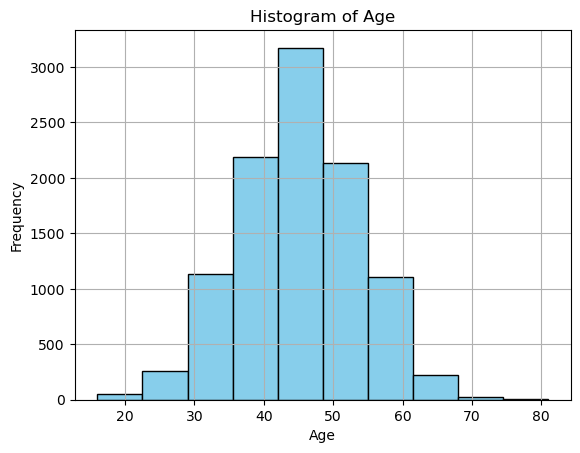

In [100]:

import matplotlib.pyplot as plt
plt.hist(data['AGE'], bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

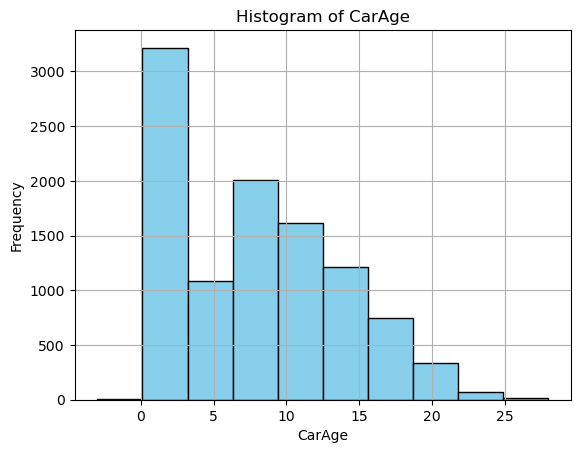

In [101]:
plt.hist(data['CAR_AGE'], bins=10, color= 'skyblue', edgecolor= 'black')
plt.title('Histogram of CarAge')
plt.xlabel('CarAge')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

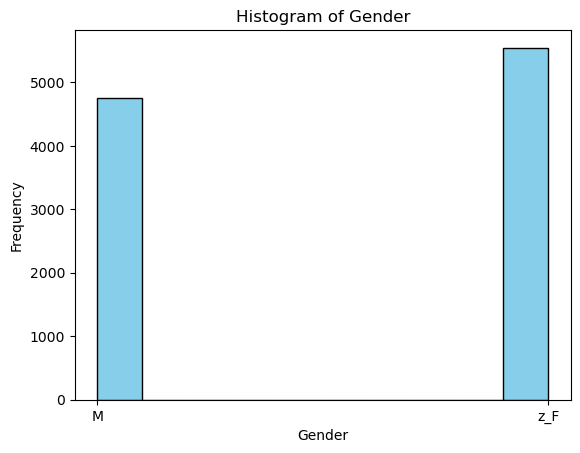

In [102]:
plt.hist(data['GENDER'], bins = 10, color='skyblue', edgecolor='black')
plt.title('Histogram of Gender')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.show()